In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore, ttest_1samp, f_oneway, chi2_contingency, linregress


In [2]:
data = {
'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah'],
'Gender': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female'],
'Height': [160, 175, 168, 180, 158, 170, 165, 162],
'Marks': [85, 78, 90, 88, 76, 95, 89, 84],
'Grade': ['A', 'B', 'A', 'A', 'C', 'A', 'B', 'A'],
'Result': ['Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass']
}
df = pd.DataFrame(data)

In [24]:
# 2. Central Tendencies

df['Marks'].mean()

85.625

In [23]:
df['Marks'].median()

86.5

In [22]:
df['Marks'].mode()[0]

76

In [19]:
sort = df['Marks'].sort_values()
sort

4    76
1    78
7    84
0    85
3    88
6    89
2    90
5    95
Name: Marks, dtype: int64

In [25]:
#3. Measures of Spread

In [26]:
df['Marks'].max() - df['Marks'].min()

19

In [27]:
df['Marks'].var()

39.69642857142857

In [28]:
df['Marks'].std()

6.300510183423924

In [29]:
# 4. Sampling Methods
df.sample(3) # Simple Random
df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(1)) # Stratified

C:\Users\shubham ekhande\AppData\Local\Temp\ipykernel_27040\1398625121.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(1)) # Stratified


,Name,Gender,Height,Marks,Grade,Result
7,Hannah,Female,162,84,A,Pass
2,Charlie,Male,168,90,A,Pass


In [30]:
# 5. Probability Concepts
(df['Gender'] == 'Male').mean() # P(Male)
len(df[(df['Gender'] == 'Male') & (df['Result'] == 'Pass')]) / len(df) # Joint
df[df['Gender'] == 'Male']['Result'].value_counts(normalize=True)['Pass'] # Conditional

1.0

In [36]:
# 6. Bayes' Theorem
P_A = (df['Result'] == 'Pass').mean()
P_B = (df['Gender'] == 'Male').mean()
P_B_given_A = len(df[(df['Result'] == 'Pass') & (df['Gender'] == 'Male')]) / len(df[df['Result'] == 'Pass'])
P_A_given_B = (P_B_given_A * P_A) / P_B


In [37]:
P_A

0.875

In [38]:
P_B

0.5

In [39]:
P_B_given_A

0.5714285714285714

In [40]:
P_A_given_B

1.0

<Axes: xlabel='Marks', ylabel='Count'>

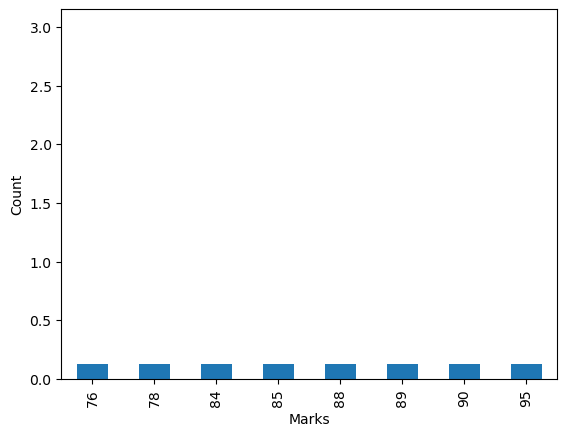

In [41]:
# 7. PMF and PDF
df['Marks'].value_counts(normalize=True).sort_index().plot(kind='bar')
sns.histplot(df['Height'], kde=True)

In [42]:
# 8. Z-Score
df['Z_Score'] = zscore(df['Marks'])
(88 - df['Marks'].mean()) / df['Marks'].std()

0.3769536007176707

In [43]:
# 9. Linear Regression
slope, intercept, _, _, _ = linregress(df['Height'], df['Marks'])
print(f"Y = {intercept:.2f} + {slope:.2f} * X")

Y = 46.16 + 0.24 * X


In [47]:
# 10. Inferential Statistics
# T-Test
ttest_1samp(df['Marks'], 80)
# ANOVA
f_oneway(df[df['Grade']=='A']['Marks'], df[df['Grade']=='B']['Marks'], df[df['Grade']=='C']['Marks'])
# Chi-Square
chi2_contingency(pd.crosstab(df['Gender'], df['Result']))

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[0.5, 3.5],
       [0.5, 3.5]]))

In [48]:
# 11. Confidence Interval
mean = df['Marks'].mean()
std = df['Marks'].std()
n = len(df)
z = 1.96
(lower, upper) = (mean - z*(std/np.sqrt(n)), mean + z*(std/np.sqrt(n)))
print("95% CI:", (lower, upper))

95% CI: (81.25896919387873, 89.99103080612127)
